Q1.
    a. Please download the data from "http://archive.ics.uci.edu/ml/datasets/Liver+Disorders"
    b. Get to know about the features
        i. given data set has 6 attributes and 1 output varaible
    c. Find me the two most corelated feature out of 6 attributes with the output varaible
    d. Prove that the features are correlated with output varaible using null hypothsis test
        i.hint: consider 100 random samples from the data set and find out the correlation, repeat it for 50 times

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as sp
from random import * 
from __future__ import division

h=['mcv','alhphos','sgpt','sgot','gammagt','drinks','selector']
data= pd.read_csv("dataLiver.csv",names=h)

print data.head() 

   mcv  alhphos  sgpt  sgot  gammagt  drinks  selector
0   85       92    45    27       31     0.0         1
1   85       64    59    32       23     0.0         2
2   86       54    33    16       54     0.0         2
3   91       78    34    24       36     0.0         2
4   87       70    12    28       10     0.0         2


In [5]:
data.describe()

,mcv,alhphos,sgpt,sgot,gammagt,drinks,selector
count,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000
mean,90.159420,69.869565,30.405797,24.643478,38.284058,3.455072,1.579710
std,4.448096,18.347670,19.512309,10.064494,39.254616,3.337835,0.494322
min,65.000000,23.000000,4.000000,5.000000,5.000000,0.000000,1.000000
25%,87.000000,57.000000,19.000000,19.000000,15.000000,0.500000,1.000000
50%,90.000000,67.000000,26.000000,23.000000,25.000000,3.000000,2.000000
75%,93.000000,80.000000,34.000000,27.000000,46.000000,6.000000,2.000000
max,103.000000,138.000000,155.000000,82.000000,297.000000,20.000000,2.000000


In [6]:
data['selector'].value_counts()

2    200
1    145
Name: selector, dtype: int64

Calculating the Spearman's Rank Correlation Coefficient between the different features and the output variable

In [7]:
print sp.spearmanr(data['mcv'],data['selector'])

SpearmanrResult(correlation=-0.10246626896937111, pvalue=0.057259266268041349)


In [8]:
sp.spearmanr(data['alhphos'],data['selector'])

SpearmanrResult(correlation=-0.12222686443646685, pvalue=0.023174635184627524)

In [9]:
sp.spearmanr(data['sgpt'],data['selector'])

SpearmanrResult(correlation=-0.13467770721374014, pvalue=0.012284455216342641)

In [10]:
sp.spearmanr(data['sgot'],data['selector'])

SpearmanrResult(correlation=0.14463984221647871, pvalue=0.007124242098003857)

In [11]:
sp.spearmanr(data['gammagt'],data['selector'])

SpearmanrResult(correlation=0.21961129022957107, pvalue=3.8779315464892418e-05)

In [12]:
sp.spearmanr(data['drinks'],data['selector'])

SpearmanrResult(correlation=0.038725467248969442, pvalue=0.47340364292085135)

- The features 'gammagt' and 'sgot' are the most correlated to the output variable 'selector'.

In [13]:
#Null Hypothesis: gammagt and selector are not correlated
p=0
for i in range(50):
    sg=[]
    ss=[]
    for j in range(100):
        x=randint(0,344)
        sg.append(data.loc[x,'gammagt'])
        ss.append(data.loc[x,'selector'])
        
    if sp.spearmanr(sg,ss).correlation<0.10:
        p+=1

print p/50
        
        
#Since, p=0.04<0.05 I reject the null hypothesis with 95% confidence
# and conclude that gammagt and selector are correlated.
    

0.18


In [14]:
#Null Hypothesis: sgot and selector are not correlated
p=0
for i in range(50):
    sg=[]
    ss=[]
    for j in range(100):
        x=randint(0,344)
        sg.append(data.loc[x,'sgot'])
        ss.append(data.loc[x,'selector'])
        
    if sp.spearmanr(sg,ss).correlation<0.08:
        p+=1

print p/50

#Since p is high I fail to reject the null hypothesis that sgot and selector are not correlated

0.24


Q2.
    a. Simulate the coin tossing by writing a function wich gives the output "head" with 50% chance and "tail" with 50% chance
    b. call the same function 250 times, find out the number tests which gave the output "head"
    c. based on the result conclude that the coin is baised or not
    d. prove your conclusion with the help of null hypothisis test

In [63]:
def toss():
    x=random()
    if(x<0.5):
        return "H"
    else:
        return "T"
def expt():
    l=[]
    count_heads=0
    for i in range(250) :
        x=toss()
        if x=="H":
            l.append("H")
            count_heads+=1
        else:
            l.append("T")
    return count_heads,l

C,l=expt()

print C

126


In [64]:
#Given that the value of one experiment resulted in 115 heads out of 250 coin tosses instead of approx. 125, 
#I hypothesize that the coin is biased.  

#Null Hypothesis:- The coin is biased
#Alternate Hypothesis:- The coin is unbiased

# To test this a sample of 50 values is taken from the array containing the result of the 250 coin tosses. If the no. of heads
#is not between 23 to 27 the coin is assumed to be biased. This experiment is repeated for 100 times and the probability 
# of the number of biased coins is tested. 

p=0
for i in range(100):
    s=sample(l,50)
    ch=0
    for x in s:
        if x=="H":
            ch+=1
    if ch not in range(23,26):
        p+=1

p=p/100
print p

#Since 55 out of the 100 random samples showed that the coin is biased, 
#I fail to reject the null hypothesis and conclude that the coin is biased.

0.61


In [17]:
import numpy as np
import math
def generate_data():
    X = np.linspace(-10,10, 500)
    Y = [(4 / 3 ** 2) * (x - 3) ** 2 for x in X]
    return X, Y

<pre>
Q3. 
    a. call the function genarate_data() to get two vectors, "X, Y = genarate_data()"
    b. find out the trasofrmation of given vectors which will help us to find the correlation between X, Y with the help of techniques that are discussed in the class (Pearson Product Moment Correlation, Spearman rank Order Correlation)
        hint: use the techniques that are discussed in the class while solving "X^2 + Y^2 =a^2 (circle data)"
    </pre>

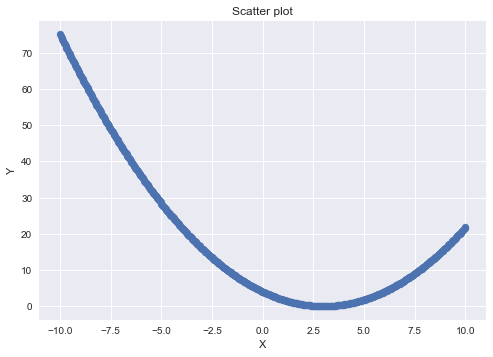

In [18]:
X,Y=generate_data()
plt.scatter(X,Y)
plt.title('Scatter plot')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [19]:
print sp.spearmanr(X,Y)
print sp.pearsonr(X,Y)

SpearmanrResult(correlation=-0.65553142212568849, pvalue=1.0024014496100716e-62)
(-0.75729314730485919, 3.3483974622873407e-94)
